# Final Project Design

# Project Overview

In this project, I am attempting to improve the work that I started in Social Media Research by using the python tool set.  

## Research Question:  

Provide context to voter reactions to the political hypocrisy of elected officials, specifically the 2 leading Senators of both political parties, in their words and actions taken on the Supreme Court nomination and confirmation process of Association Justice Amy Coney Barrett to fill the vacancy created by the passing of Associate Justice Ruth Bader Ginsburg 45 days prior to Election Day 2020.  This porject looks at how partisanship mitigates the negative reaction to hypocritical comments and elections by elected officials in influencing voter behavior.

## Limitations of Prior Effort:

The previous effort used the TAGS Twitter scraper on a periodic basis to scrape four specific hashtags:

- #GOPHypocrisy
- #FillTheSeatNow 
- #RBGsDyingWish 
- #SCOTUS

and the Tweets by and directed toward the four US Senators holding the most influential leadership roles:

-	Senate Majority Leader Mitch McConnell (Republican),
-	Senate Minority Leader Chuck Schumer (Democrat),
-	Senate Judiciary Committee Chair Lindsey Graham (Republican), and
-	Senate Judiciary Committee Ranking Member Dianne Feinstein (Democrat

as well as the Tweets of election challengers to Senators McConnell and Graham joined the list:
-	Amy McGrath (Democrat) running against Mitch McConnell and
-	Jaime Harrison (Democrat) running against Lindsey Graham.

Neither Senator Feinstein nor Senator Schumer faced re-election in 2020. 

Twitter scraping occurred randomly between September 20 and October 1.

## Improvements to Methodolgy through Python:

I am attempting two improvements to this project.  

Part 1 - I will be adding the analysis a few historical texts to determine if their authors addressed either hyprocrisy or partisanship.  
Part 2 - I will use my Twitter development credentials to scrape a more complete set of Tweets.



# Dependencies

Add the import code for every dependency of your project: for instance, if you are collecting data, you might import Tweepy or BeautifulSoup. If you're working with a file of folders, import os. Most projects will require Pandas, along with appropriate processing and visualization libraries. In the comments, explain briefly why you are including each library (as shown in the example below.)

In [15]:
# Part 1 Dependencies

# Import Natural Language Tokenizer to process the texts

import nltk
import nltk.tokenize

# Import regular expressions to process strings

import re

# Import collections to create container for document term matrix

import collections

# Import NumPy for counting functions

import numpy as np 

# Importing matplot lib to visualize word counts

import matplotlib.pyplot as plt


In [ ]:
#Part 2 Dependencies

# Collection

Describe your data collection scope and process briefly, and include an example of how you might collect your data drawing on our other projects. For example, if this workflow will collect Twitter data from a stream, you might revisit that demo, copy the stream, and adjust the hashtag.

In [7]:
# Part 1 Collection

# Downloaded text files from Project Gutenberg from authors that influenced or represent our understanding of democracy.

nltk.download('punkt', quiet=True)

corpus = ["Artistotle.txt","Locke.txt","Mill.txt","Plato.txt","Rousseau.txt"]
titles = ["Aristotle","Locke","Mill","Plato","Rousseau"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)


In [ ]:
# Part 2 Collection

# Processing

After your data has been collected or imported, store it in a format that works for your purposes. This can vary: for Twitter analysis, it might be a Pandas dataframe, while for text, you might build a document term matrix.

In [9]:
# Part 1 Processing

# Creating a tokenized corpus from the files, including deletion of punctuation and converted all to lowercase

PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens


tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

# Creating the document term matrix from the tokenized corpus, to include word frequencies

def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)

vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])


["'as-is", "'d", "'it", "'s", "'t", '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.pgdp.net', '//www.pglaf.org', '/i', '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '1/2', '1/3', '10', '10.', '100', '100,000', '100.', '101', '102', '103', '104', '107', '108', '11', '11.', '112', '113', '116.', '117', '118', '12', '12.', '121', '122', '124', '125', '126', '127.', '129', '13', '13.', '130', '131', '135', '136', '137', '138', '14', '14.', '140', '142', '143', '146', '149', '15', '150', '1500', '151', '152', '16', '16.', '160', '163', '166', '1667', '167', '168', '1688', '169', '1690', '17', '17.', '173', '1743']


In [ ]:
# Part 2 Processing

# Analysis

Think across all of the methods we've tried this semester - what combination would be most helpful for your goals? Include code sections for each method you think is important. In most cases, a combination will be most revealing: for instance, you might employ several different textual analysis frameworks on a set of documents. Use at least two distinctly different methods of analysis.

In [14]:
# Part 1 Analysis

# Counting instances of hypocrisy, partisan, partisanship, party, and parties in each of the documents

def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

# Counting instances of hypocrisy, partisan, party, and parties in each of the documents
# Originally I included partisanship, but it was not in the document term matrix, so it is now commented out

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
hypocrisy_id = vocabulary.index('hypocrisy')
partisan_id = vocabulary.index('partisan')
# partisanship_id = vocabulary.index('partisanship')
party_id = vocabulary.index('party')
parties_id = vocabulary.index('parties')

hypocrisy_counts = document_term_matrix[:, hypocrisy_id]
partisan_counts = document_term_matrix[:, partisan_id]
# partisanship_counts = document_term_matrix[:, partisanship_id]
party_counts = document_term_matrix[:, party_id]
parties_counts = document_term_matrix[:, parties_id]

print("Hypocrisy: " + str(hypocrisy_counts))
print("Partisan: " + str(partisan_counts))
# print("Partisanship: " + str(partisanship_counts))
print("Party: " + str(party_counts))
print("Parties: " + str(parties_counts))




Hypocrisy: [1 0 1 0 0]
Partisan: [0 0 1 1 0]
Party: [28  8 15 15 12]
Parties: [15  2 12  4 13]


In [ ]:
# Part 2 Analysis

# Visualization

Finally, think about the visualizations that would be most useful to sharing and exploring your data. Consider both static and dynamic approaches from the different libraries we've worked with this semester. Include at least two preliminary visualizations.

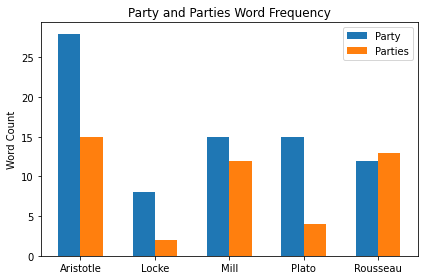

In [19]:
# Part 1 Visualization

# Hyprocrisy was not mentioned frequently in the texts.  This visualization will include only party and parties.



x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, party_counts, width, label='Party')
rects2 = ax.bar(x + width/2, parties_counts, width, label='Parties')

ax.set_ylabel('Word Count')
ax.set_title('Party and Parties Word Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

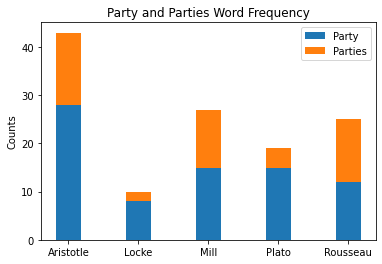

In [26]:
# Attempting a stacked bar chart as the words would be better represented cumulatively

labels = titles

Party = [28, 8, 15, 15, 12]
Parties = [15, 2, 12, 4, 13]


party_std = [0, 0, 0, 0, 0]
parties_std = [0, 0, 0, 0, 0]


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()



ax.bar(labels, Party, width, yerr=party_std, label='Party')
ax.bar(labels, Parties, width, yerr=parties_std, bottom=Party, label='Parties')

ax.set_ylabel('Counts')
ax.set_title('Party and Parties Word Frequency')
ax.legend()

plt.show()

In [ ]:
# Part 2 Visualization

# End Result of Analysis (Notes for What to Do Next)

## Part 1

The analysis was not helpful.  The texts contained few references to hyprocrisy.  They add nothing to the existing literature review.

## Part 2